In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time

In [5]:
class Const:
    def __init__(self): #carefree remotely eating cheaters
        self.n_animals_max = 2000
        self.n_animals_start = 100 #original number of animals
        self.n_smallsteps = 500
        self.vmin = 0.01
        self.vmax = 5 * self.vmin
        self.v_decay = 0.7
        self.arena_size = 3
        
        self.hp_baby = 20
        self.hp_food = 5
        self.hp_birthcost = 15
        self.hp_reproduction = 50
        self.hp_leak = 0.5
        
        self.food_rate = 1*9
        self.eating_distance = 0.01**2
        self.n_food_max = 10000
        self.n_food_start = 200 * 9

In [9]:
def model(c, show_dotses = False, ntraces  = 1):
    historical_estimation = np.zeros((c.n_smallsteps, ntraces))
                                                                                       
    for e in range(ntraces): 
    #arrays of numbers--speed and direction of each moose
        hp = np.zeros(c.n_animals_max)
        hp[:c.n_animals_start] = np.random.uniform(
            low = c.hp_baby, high = c.hp_reproduction, size = c.n_animals_start)
        
        x = np.random.uniform(low = 0, high = c.arena_size, size = c.n_animals_max)
        y = np.random.uniform(low = 0, high = c.arena_size, size = c.n_animals_max)
        vx = np.random.uniform(size = c.n_animals_max, low = c.vmin, high = c.vmax) * (
            2* np.random.randint(size = c.n_animals_max, low = 0, high = 2) -1)
        vy = np.random.uniform(size = c.n_animals_max, low = c.vmin, high = c.vmax) * (
            2* np.random.randint(size = c.n_animals_max, low = 0, high = 2) -1)
        
        #and arseny said let there be cabbage
        foodx = np.ones(c.n_food_max) * -1
        foodx[: c.n_food_start] = np.random.uniform(low = 0, high = c.arena_size, size = c.n_food_start)
        foody = np.random.uniform(low = 0, high = c.arena_size, size = c.n_food_max)
        
        
        n_animals = np.zeros(c.n_smallsteps)
        
        
        if show_dotses: #plotting preparation
                fig = plt.figure(figsize=(3,3))
                ax = plt.subplot(111)
                plt.xlim((0,1));
                plt.ylim((0,1));
                fig.show()
                fig.canvas.draw()
                #time.sleep(0.01)


        for t in range(c.n_smallsteps):
            x += vx
            y += vy
            
            #move
            vx = vx * c.v_decay + np.random.randn(c.n_animals_max) * c.vmin
            vy = vy * c.v_decay + np.random.randn(c.n_animals_max) * c.vmin
            
            #reflect
            vx = np.where(np.logical_or(x > c.arena_size, x < 0), -vx, vx)
            vy = np.where(np.logical_or(y > c.arena_size, y < 0), -vy, vy)
            x = np.maximum(0,np.minimum(x, c.arena_size))
            y = np.maximum(0,np.minimum(y, c.arena_size))
            
            potential_babies = np.argwhere(hp <= 0)
            baby_counter = 0
            for i in np.argwhere(hp > 0):
                d = np.square(foodx-x[i]) + np.square(foody-y[i])
                food_list = np.argwhere(d < c.eating_distance)
                hp[i] += food_list.size * c.hp_food
                foodx[food_list] = -1
                
                if hp[i] >= c.hp_reproduction:
                    hp[i] -= c.hp_birthcost
                    if baby_counter < len(potential_babies):
                        ind = potential_babies[baby_counter]
                        baby_counter += 1
                        hp[ind] = c.hp_baby
                        x[ind] = x[i]
                        y[ind] = y[i]
                        vx[ind] = vx[i]
                        vy[ind] = vy[i]
            potential_cabbage = np.argwhere(foodx<0)
            if potential_cabbage.size != 0:
                foodx[potential_cabbage[0]] = np.random.uniform(low = 0, high = c.arena_size)
                foody[potential_cabbage[0]] = np.random.uniform(low = 0, high = c.arena_size)
                
            hp -= c.hp_leak
            
            n_animals[t] = np.sum(hp > 0)
                  
            if show_dotses:
                ax.clear()
                plt.plot(x[hp > 0],y[hp > 0], "k.", markersize = 5);
                plt.plot(foodx, foody, "g.", markersize = 2)
                plt.xlim((0, c.arena_size));
                plt.ylim((0, c.arena_size));
                fig.canvas.draw()
                #time loop is over
            else:
                print(".", end = "")
            
            historical_estimation[:,e] = n_animals
        return np.mean(historical_estimation, axis = 1)  ;   

<IPython.core.display.Javascript object>


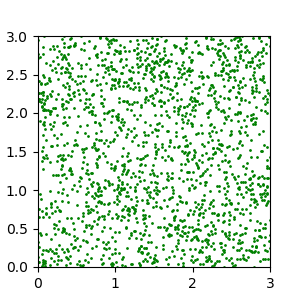

<IPython.core.display.Javascript object>


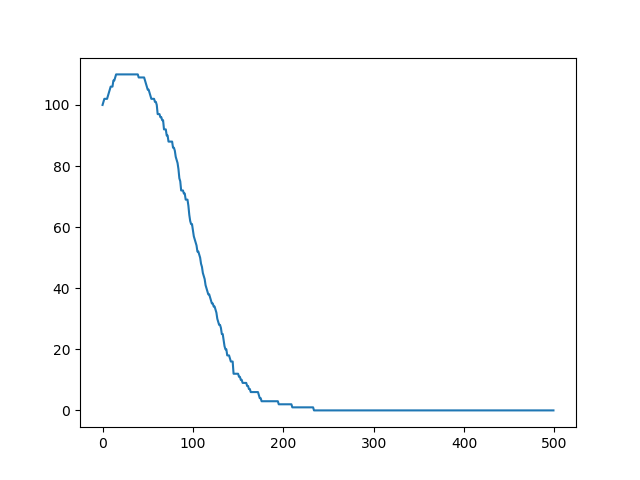

In [10]:
c = Const()
np.random.seed(1)
curve = model(c, show_dotses = True);
plt.figure()
plt.plot(curve)

10